# 과제 2번: Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
                 2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
                          1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,
                              5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,
                        1047,965,943,958,971,949,884,866,876,822,704,719]}
df = pd.DataFrame(data)

print(df)

# index_price: 물가지수
# interest_rate: 이자율
# unemployment_rate: 실업률

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

In [2]:
# 선형 회귀: 이자율과 물가지수 상관 관계 분석

df = df.to_numpy()

interest_rate = df[:,2]
index_price = df[:,4]

interest_rate = interest_rate.reshape(-1, 1)
# index_price = index_price.reshape(-1, 1)

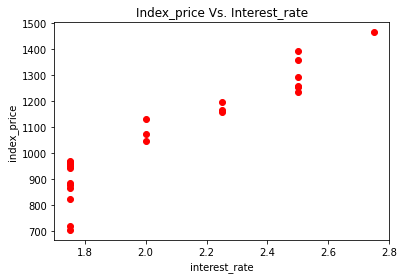

In [3]:
# 산점도
plt.scatter(interest_rate, index_price, color = "r")
plt.xlabel("interest_rate")
plt.ylabel("index_price")
plt.title("Index_price Vs. Interest_rate")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
interest_rate, index_price, random_state=42)

In [5]:
# 선형 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)


# 기울기(a): coef_, 절편(bias): intercept_
print(lr.coef_, lr.intercept_)

[574.45637584] -127.38255033557039


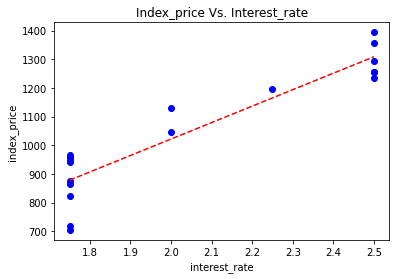

Interest Rate vs. Index Price
coef_:[574.45637584], intercept_-127.38255033557039
train data score:  0.8541859618501457
test data score:  0.9418923929450573


In [6]:
plt.scatter(train_input, train_target, color = "b")
plt.plot([1.75, 2.5], [1.75*lr.coef_ + lr.intercept_, 2.5*lr.coef_ + lr.intercept_], color='red', linestyle='--')
plt.xlabel("interest_rate")
plt.ylabel("index_price")
plt.title("Index_price Vs. Interest_rate")
plt.show()

print(f"Interest Rate vs. Index Price\ncoef_:{lr.coef_}, intercept_{lr.intercept_}")
print('train data score: ', lr.score(train_input, train_target))
print('test data score: ', lr.score(test_input, test_target))

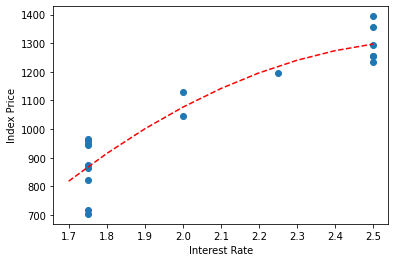

이자율과 물가지수 다항 회귀:
 다항 회귀 coef_: [-524.84946237 2802.42473118] intercept_: -2429.1028225806535


In [15]:
# 다항 회귀
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

# 모형 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# x축 범위
point= np.arange(1.7,2.6,0.1)

# 그래프 그리기
plt.scatter(train_input, train_target)
plt.plot(point, -524.8*point**2 + 2802.4*point - 2429.1, color='red', linestyle='--')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

print('이자율과 물가지수 다항 회귀:\n', '다항 회귀 coef_:', lr.coef_, 'intercept_:', lr.intercept_)

In [17]:
# 선형 회귀: 이자율과 물가지수 상관 관계 분석

unemployment_rate = df[:,3]
unemployment_rate = unemployment_rate.reshape(-1, 1)

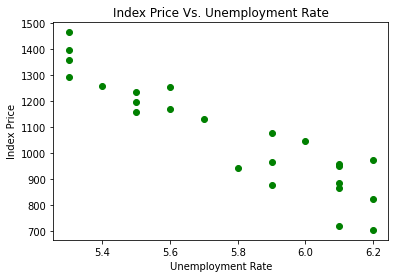

In [18]:
# 산점도
plt.scatter(unemployment_rate, index_price, color = "g")
plt.xlabel("Unemployment Rate")
plt.ylabel("Index Price")
plt.title("Index Price Vs. Unemployment Rate")
plt.show()

In [19]:
# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
unemployment_rate, index_price, random_state=42)

In [20]:
# 선형 회귀
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 기울기(a): coef_, 절편(bias): intercept_
print(lr.coef_, lr.intercept_)

[-611.41330166] 4586.054631828979


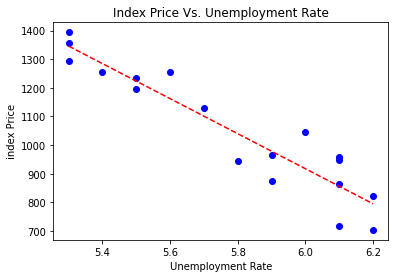

Unemployment Rate vs. Index Price
coef_:[-611.41330166], intercept_4586.054631828979
train data score:  0.8748908875163574
test data score:  0.7074751133772279


In [21]:
# 그래프 그리기
plt.scatter(train_input, train_target, color = "b")
plt.plot([5.3, 6.2], [5.3*lr.coef_ + lr.intercept_, 6.2*lr.coef_ + lr.intercept_], color='red', linestyle='--')
plt.xlabel("Unemployment Rate")
plt.ylabel("index Price")
plt.title("Index Price Vs. Unemployment Rate")
plt.show()

print(f"Unemployment Rate vs. Index Price\ncoef_:{lr.coef_}, intercept_{lr.intercept_}")

print('train data score: ', lr.score(train_input, train_target))
print('test data score: ', lr.score(test_input, test_target))

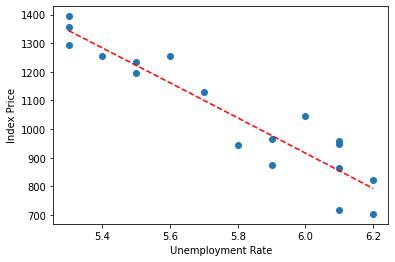

실업율과 물가지수 다항 회귀:
 다항 회귀 coef_: [  -7.26428138 -527.97932022] intercept_: 4347.248197109282


In [23]:
# 다항 회귀
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

# 모형 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# x축 범위
point= np.arange(5.3,6.3,0.1)

# 그래프 그리기
plt.scatter(train_input, train_target)
plt.plot(point, -7.3*point**2 - 528*point + 4347.2, color='red', linestyle='--')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

print('실업율과 물가지수 다항 회귀:\n', '다항 회귀 coef_:', lr.coef_, 'intercept_:', lr.intercept_)